# Excercise

Gunakan cancer_data.csv.  
* Jelaskan jenis kesalahan apa yang bisa terjadi dalam prediksi dari dataset ini. Kesalahan mana yang menurut kalian perlu ditekan? Pilihlah metric evaluasi yang sesuai.  
* Berdasarkan apa yang sudah kita pelajari sejauh ini, buatlah model dengan performa sebaik mungkin untuk memprediksi kondisi tumor!  
>* Jangan lupa gunakan cross validasi, pipeline dan hyperparameter tunning. Perhatikan bahwa setiap langkah yang memiliki method **.fit** bisa digunakan di dalam pipeline.
>* Jelaskan juga alasan-alasan kalian mengambil langkah tertentu. ex: mengapa kalian memilih satu model tertentu dibandingkan model lain.

Upload file IPYNB kalian repository github kalian yang bernama: Latihan Mentoring. Kirimkan link repo kalian ke brigita.gems@gmail.com.



Bonus:

* Buatlah function untuk mengevaluasi beberapa model sekaligus menggunakan cv dan metric evaluasi tertentu. Output dari fungsi tersebut berupa dataframe berisi nama model, rata-rata score dan std dari score.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,\
GridSearchCV, RandomizedSearchCV # model selection

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score,\
precision_score, roc_auc_score, accuracy_score # metrik evaluasi


from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler, RobustScaler  # preprocessing

from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestRegressor

In [10]:
data = pd.read_csv('cancer_data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Jelaskan jenis kesalahan apa yang bisa terjadi dalam prediksi dari dataset ini. Kesalahan mana yang menurut kalian perlu ditekan? Pilihlah metric evaluasi yang sesuai.


Kesalahan prediksi yang bisa terjadi:
 - False Negative --> seseorang diprediksi tidak memiliki tumor, meskipun sebenarnya memiliki tumor
 - False Positive --> seseorang diprediksi memiliki tumor, meskipun sebenarnya tidak memiliki tumor
 
Kesalahan yang lebih penting ditekan adalah false negative, karena bisa menyebabkan kematian bila tidak ditangani secara cepat. Oleh karena itu metric evaluasi yang digunakan adalah recall.

In [13]:
data.drop(columns=['Unnamed: 32','id'],axis =1, inplace=True)

In [14]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## EDA

In [15]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Cancer Measurement Mean')

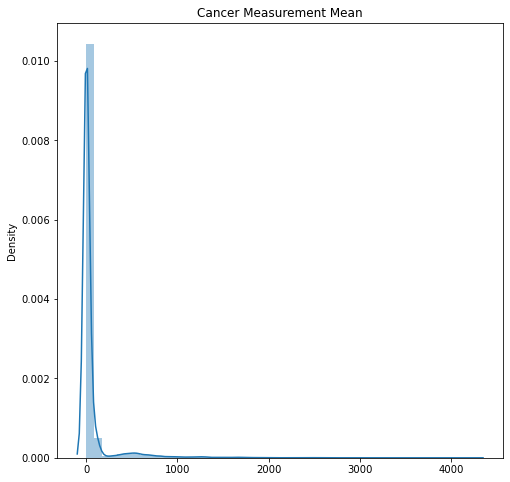

In [28]:
plt.figure(figsize =(8,8))
sns.distplot(data.drop(columns = 'diagnosis'))
plt.title('Cancer Measurement Mean')

Text(0, 0.5, 'Nilai')

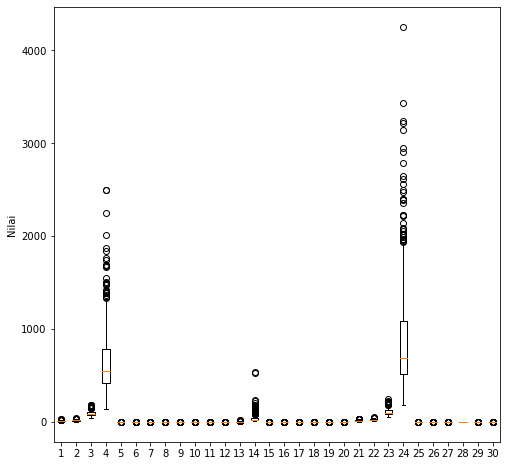

In [29]:
plt.figure(figsize =(8,8))
plt.boxplot(data.drop(columns = 'diagnosis'))
plt.ylabel('Nilai')

Dari visualisasi di atas, distribusi data tidak normal & data punya banyak outlier --> scalling menggunakan robust scaler

## Data Splitting

In [31]:
x = data.drop(columns='diagnosis')
y = np.where(data['diagnosis'] == 'M',1,0)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

## Model Benchmark

In [39]:
models = [
    ['Log Regression', LogisticRegression(max_iter=10000)], 
    ['Decision Tree', DecisionTreeClassifier(max_depth=3, random_state=2020)], 
    ['K Neighbors', KNeighborsClassifier(n_neighbors=2)]
]

In [40]:
skfold = StratifiedKFold(n_splits = 5)

def evaluate (models):

    model_name=[]
    scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('scalling', RobustScaler()),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,x_train,y_train,scoring='recall',cv=skfold).mean()
        std= cross_val_score(estimator,x_train,y_train,scoring='recall',cv=skfold).std()
        scores.append(score)
        score_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'score':scores, 'score_std':score_std})

In [41]:
evaluate(models)

,Name,score,score_std
0,Log Regression,0.958824,0.039896
1,Decision Tree,0.911765,0.058824
2,K Neighbors,0.905882,0.059988


In [43]:
def recall (models):

    model_name=[]
    recall_scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('scalling', RobustScaler()),
            ('model', model)])

        estimator.fit(x_train,y_train)
        y_pred = estimator.predict(x_test)
        recall = recall_score(y_test, y_pred)
        recall_scores.append(recall)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'Recall score':recall_scores})

In [44]:
recall(models)

,Name,Recall score
0,Log Regression,0.904762
1,Decision Tree,0.833333
2,K Neighbors,0.809524


Berdasarkan hasil cross validation, Log Regression memiliki cross validation tertinggi dan standar deviation terendah, sehingga model dengan performa terbaik untuk dataset ini adalah Log Regression. Hal ini juga diperkuat dengan hasil recall masing-masing model, dimana Log Regression juga memiliki nilai recall tertinggi. 

## Hyperparameter Tuning

In [53]:
logreg = LogisticRegression(max_iter=10000)
estimator = Pipeline([
    ('scalling', RobustScaler()), 
    ('model', logreg)
])

In [54]:
hyperparam_space = {
    'model__solver' : ['liblinear', 'newton-cg'],
    'model__C' : [100, 10, 1, 0.1, 0.01, 0.001],
    'model__class_weight' : [None, 'balanced']
}

In [55]:
skfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall',
    n_jobs=-1
)

In [56]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scalling', RobustScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__class_weight': [None, 'balanced'],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='recall')

In [57]:
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Param: {}'.format(grid_search.best_params_))

Best Score: 0.9823529411764707
Best Param: {'model__C': 0.01, 'model__class_weight': None, 'model__solver': 'liblinear'}


## Model Performance in Test Set

### Before Tuning

In [59]:
logreg = LogisticRegression(max_iter=10000)
estimator = Pipeline([
    ('scalling', RobustScaler()), 
    ('model', logreg)
])

In [60]:
estimator.fit(x_train,y_train)
y_pred = estimator.predict(x_test)
print(recall_score(y_test,y_pred))

0.9047619047619048


### After Tuning

In [58]:
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)
print(recall_score(y_test, y_pred))

0.9523809523809523


Model mengalami peningkatan performa model setelah hyperparameter tuning. 